## 测试music21的midi转musicxml功能

In [ ]:
from music21 import *

midifile = converter.parse(r'材料\Pirates_of_the_Caribbean_-_Hes_a_Pirate.custom_score.mid')

# 获取拍号信息
time_signatures = midifile.flat.getElementsByClass(meter.TimeSignature)

# 打印拍号信息
for ts in time_signatures:
    print("Time Signatures:", ts.ratioString)


In [ ]:
from music21 import converter  

# MIDI文件路径  
midi_file_path = '材料\summer.mid'  

# 加载MIDI文件  
midi_stream = converter.parse(midi_file_path)  

# 转换为MusicXML格式  
musicxml_string = midi_stream.write('musicxml')  

# 写入MusicXML文件  
with open('output_file.musicxml', 'w') as f:  
    f.write(musicxml_string)

## 识别拍号速度

In [ ]:
import madmom  
from madmom.features import DBNBeatTrackingProcessor  
from madmom.audio.signal import Signal  
import numpy as np
  
# 加载音频文件  
audio_file = '材料\Summer_Joe_Hisaishi.mp3'  
signal = Signal(audio_file)  
  
# 初始化节拍跟踪处理器  
beat_proc = DBNBeatTrackingProcessor(fps=100)  # 设置处理帧率，这里使用100fps  
  
# 对音频信号进行处理，获取节拍事件  
beats = beat_proc(signal)  
  
# 打印节拍事件  
for beat in beats:  
    print(f"Beat at time: {beat.time}, confidence: {beat.confidence}")  
  
# 估计速度（BPM）  
# 计算平均节拍间隔  
beat_intervals = np.diff(beats.times)  
average_interval = np.mean(beat_intervals)  
  
# 将平均节拍间隔转换为BPM（每分钟节拍数）  
bpm = 60.0 / average_interval  
print(f"Estimated BPM: {bpm:.2f}")


In [ ]:
import madmom  
from madmom.features import CQT  
from madmom.audio.signal import Signal  
from madmom.audio.filters import DownsampleFilter  
from madmom.processors import RNNBeatTrackingProcessor  
  
# 加载音频文件  
audio_file = 'your_audio_file.wav'  
signal = Signal(audio_file)  
  
# 对音频信号进行下采样和CQT特征提取  
cqt_features = CQT(fps=100)(signal)  
downsampled_cqt = DownsampleFilter(fps=20)(cqt_features)  
  
# 初始化RNN节拍跟踪处理器  
rnn_beat_proc = RNNBeatTrackingProcessor(fps=20)  
  
# 运行RNN节拍跟踪处理器  
beats = rnn_beat_proc(downsampled_cqt)  
  
# 打印节拍事件  
for beat in beats:  
    print(f"Beat at time: {beat.time}, confidence: {beat.confidence}")

## 直接实现

In [3]:
from music21 import *

c = converter.parse(r'材料\Summer_Joe_Hisaishi.mxl.xml')

# configure.run()


In [4]:
environLocal = environment.Environment('converter.museScore')

museScorePath = environLocal['musescoreDirectPNGPath']

print(museScorePath)

C:\Program Files\MuseScore 4\bin\MuseScore4.exe


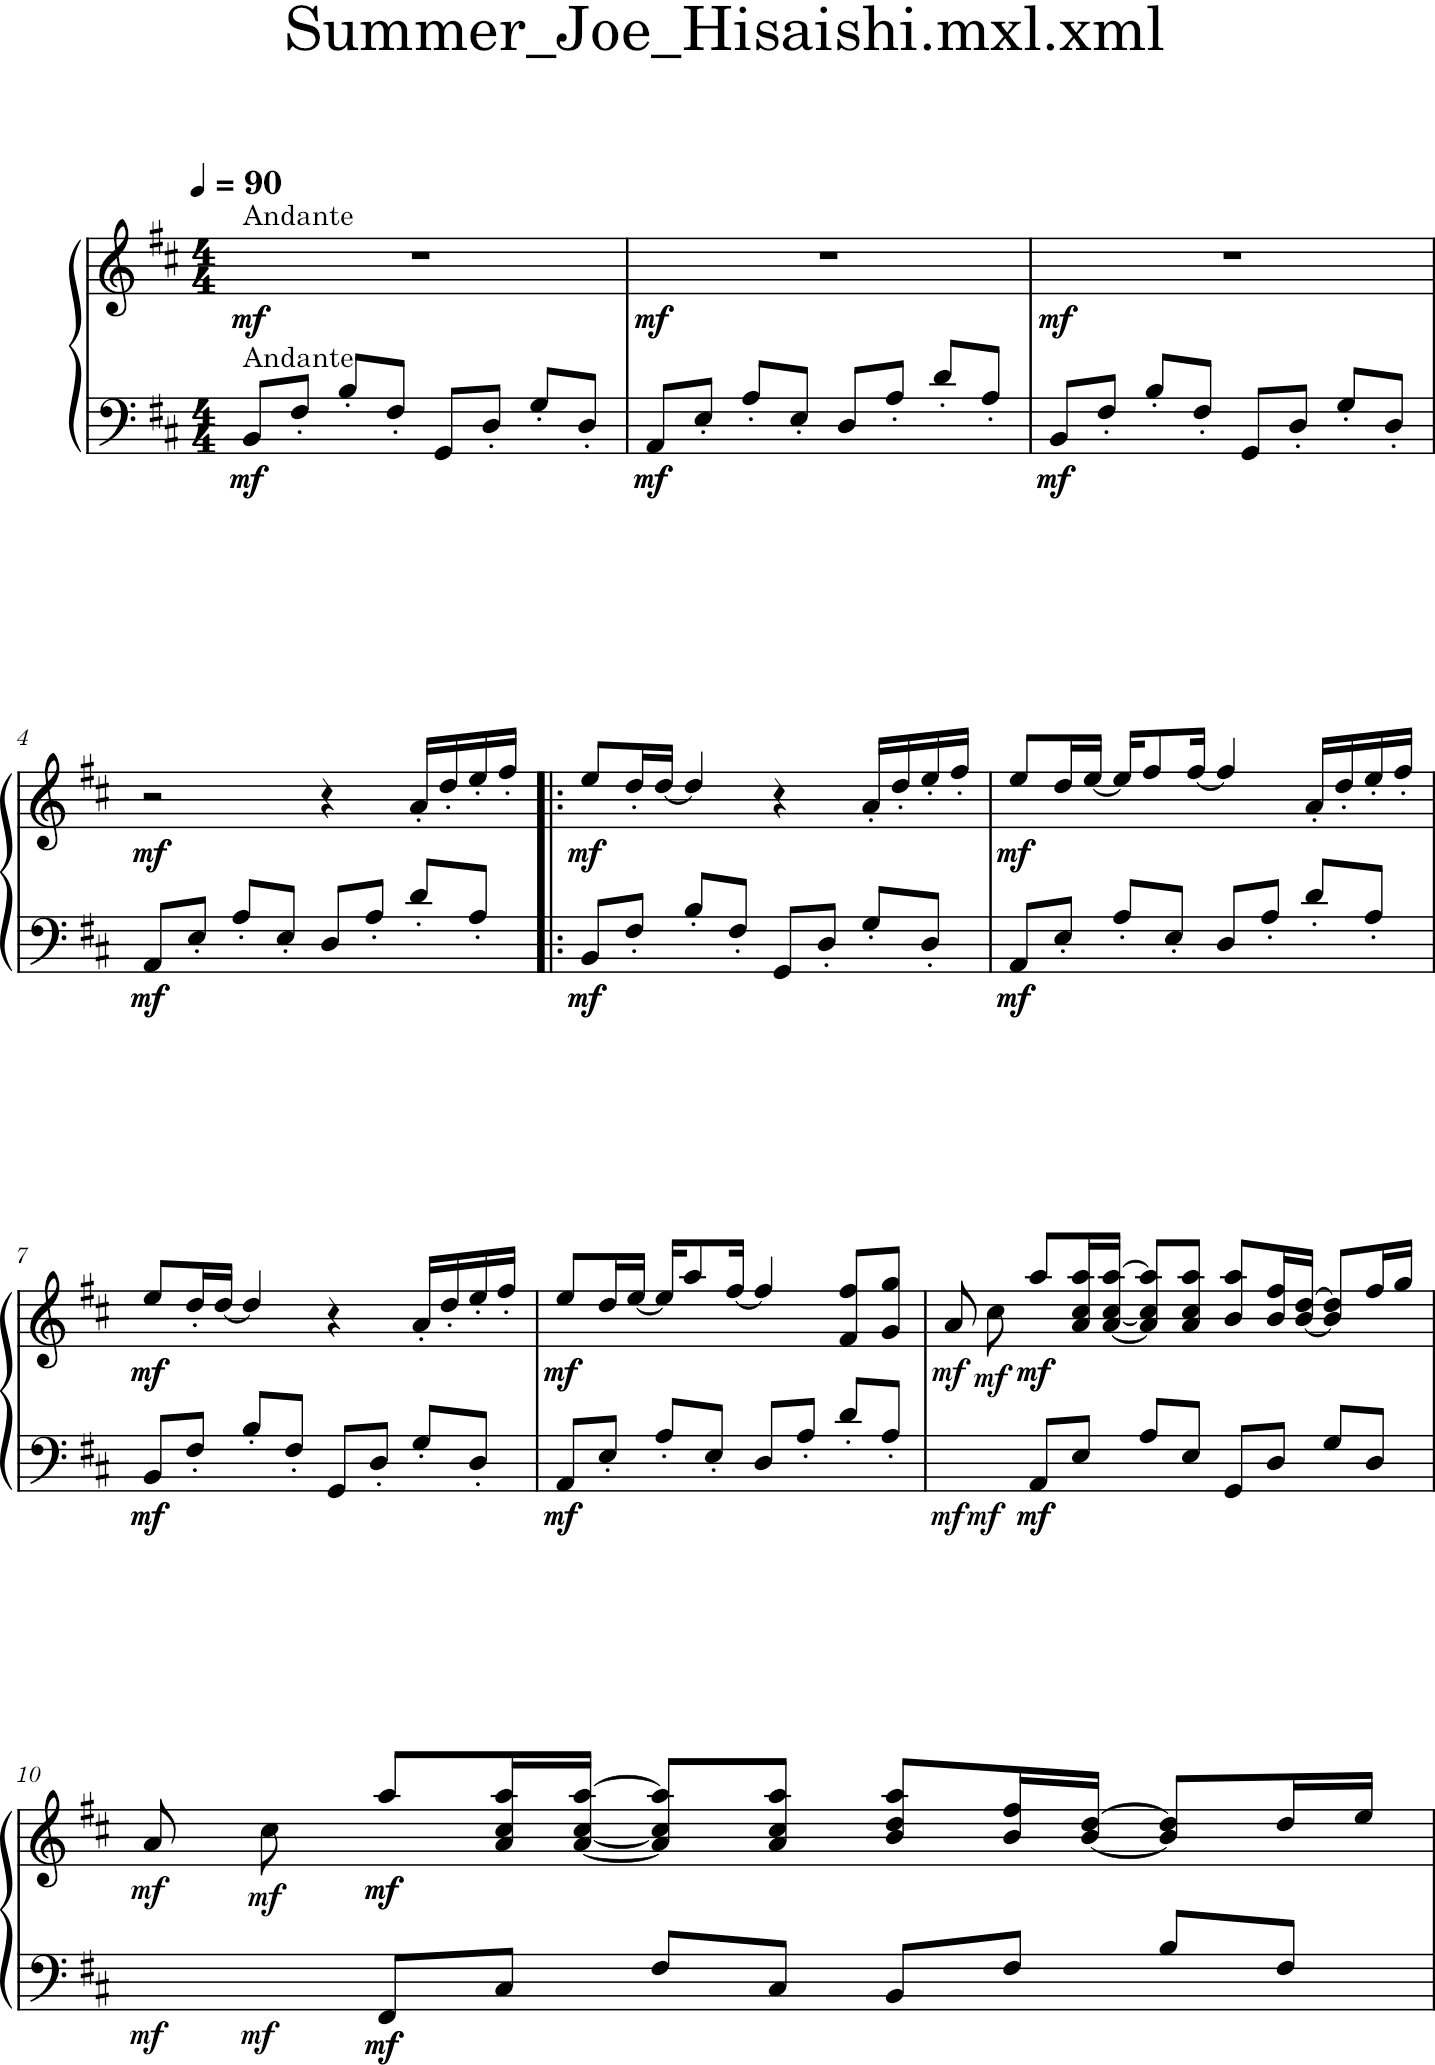

In [6]:
c.measures(1, 10).show()

In [ ]:
def pitch_to_note_name(pitch):
    #音名列表，从C开始，包含所有的半音
    notes =['C','C#','D','D#','E','F','F#','G#','A#','B']
    #计算pitch在notes列表中的索引
    # #由于我们是从@开始计数的，而音名列表是从C开始的，所以需要做一些调整#我们还需要将pitch值映射到@到11的范围内，因为notes列表只有12个元素
    index=(pitch % 12)
    # 返回对应的音名
    #添加八度标记，假设每12个pitch值是一个新的八度
    return notes[index]+str(1+(pitch // 12))